# question 1
# PART-D quadratic element

In [1]:
import numpy as np
import pandas as pd


In [9]:
n=[2,4,6,8,10] #element_num_list
#e=[3,5,7,9,11] #number_of_nodes
stiffnes_values=[] # having coefficients AE/L=K=20000
for i in n:
    elem_coord=[0]
    j=0
    while max(elem_coord) <=1:
        j+=1/(i)
        elem_coord.append(j)
        window_size = 2
        k = 0
        moving_averages = []
    while k < len(elem_coord) - window_size+1:
        window = elem_coord[k : k + window_size]
        window_average = (3-2*round(sum(window) / window_size, 2))*i
        moving_averages.append(window_average)
        k += 1
    del moving_averages[-1]
    moving_averages = [round(x) for x in moving_averages]
    stiffnes_values.append(moving_averages)

In [18]:
elem_node_list=[]
for i in n:
    j=1
    elem_node = np.array([[0,0,0]])

    while j<=2*i+1:
        elementNodes=np.array([[j ,j+1,j+2]])
        j+=2
        elem_node=np.concatenate((elem_node,elementNodes), axis=0)
    elem_node=np.delete(elem_node,[0,-1], 0)
    elem_node_list.append(elem_node)


# initializing displacement, force and stiffness arrays

In [19]:
d_mat,f_mat,k_mat=[],[],[]
for i in n:
    d_mat.append(np.zeros((2*i+1,1)))
    f_mat.append(np.zeros((2*i+1,1)))
    k_mat.append(np.zeros((2*i+1,2*i+1)))


# apply loads at node 

In [20]:
for i in range(len(n)):
    f_mat[i][-1][0]=100

# assembly of stiffness matrix

In [21]:
master_stiffness=[]
for i in range(len(n)):
    for j in range(n[i]):
        elementDof=elem_node_list[i][j,]
        rows=np.array([[elementDof[0]-1, elementDof[0]-1,elementDof[0]-1],
        [elementDof[1]-1, elementDof[1]-1,elementDof[1]-1],[elementDof[2]-1, elementDof[2]-1,elementDof[2]-1]
        ], dtype=np.intp)

        columns=np.array([[elementDof[0]-1, elementDof[1]-1, elementDof[2]-1],
        [elementDof[0]-1, elementDof[1]-1, elementDof[2]-1],
        [elementDof[0]-1, elementDof[1]-1, elementDof[2]-1]],dtype=np.intp)

        a=stiffnes_values[i][j]
        k_mat[i][rows,columns]=k_mat[i][rows,columns]+np.array([[7*a/3,-8*a/3,a/3],[-8*a/3,16*a/3,-8*a/3],[a/3,-8*a/3 ,7*a/3]])
    b=k_mat[i]*20000
    master_stiffness.append(b)

# boundary conditions and solution

In [22]:
active_dof_list=[]
for i in n:
    prescribedDof=np.array([[0]]) # corresponding to reaction (restricted DOF)
    active_dof_list.append(np.setdiff1d(np.linspace(0,2*i,num=2*i+1),prescribedDof))

In [23]:
displacement_list1=[]
for i in range(len(n)):
    reduced_stiffness1=np.delete(k_mat[i],prescribedDof , axis=0)
    reduced_stiffness=np.delete(reduced_stiffness1,prescribedDof , axis=1)
    reduced_force=np.delete(f_mat[i],prescribedDof , axis=0)
    disp=np.linalg.solve(reduced_stiffness, reduced_force)/20000
    displacement_list1.append(disp)


In [24]:
import matplotlib.pyplot as plt


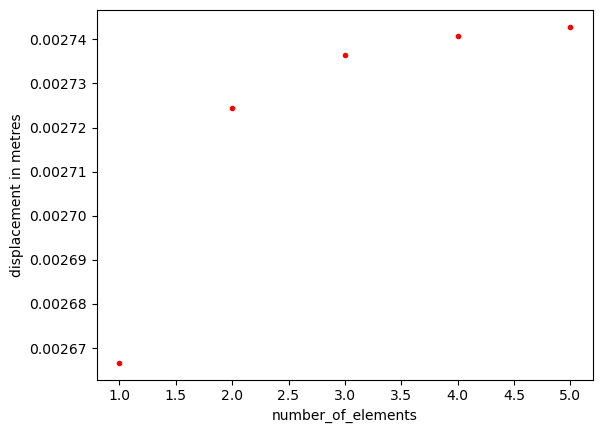

In [25]:
for i in range(len(n)):
    #plt.plot(i+1, displacement_list1[i][-1][0],'r.')
    #plt.xlabel("number_of_elements")
    #plt.ylabel("displacement in metres")